In [1]:
import requests
from bs4 import BeautifulSoup
import urllib.request as req
import re
import matplotlib as mpl
import matplotlib.pylab as plt
import matplotlib.font_manager as fm
import numpy as np
import pandas as pd
import sys
import datetime
import time

mpl.rcParams['axes.unicode_minus']=False
font_l=fm.findSystemFonts(fontpaths=None,fontext='ttf')
# f=[f.name for f in fm.fontManager.ttflist]
# [(f.name,f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]
path = 'C:/Windows/Fonts/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

In [2]:
class STOCK():
    def __init__(self, rank, code, name, final, total, shares, volume, per, roe,\
                prev_date, price_trend, prev_rise, prev_per, volume_trend,  agency_trend, foreign_trend):
        self.rank=rank
        self.code=code   
        self.name=name
        self.final=final
        self.total=total
        self.shares=shares
        self.volume=volume
        self.per=per
        self.roe=roe
        self.prev_date=prev_date
        self.price_trend=price_trend
        self.prev_rise=prev_rise
        self.prev_per=prev_per
        self.volume_trend=volume_trend
        self.agency_trend=agency_trend
        self.foreign_trend=foreign_trend
        self.rise_rate20=(price_trend[0]-price_trend[19])/price_trend[19]*100
       # self.rise_rate40=(price_trend[20]-price_trend[39])/price_trend[39]*100
       # self.rise_rate60=(price_trend[40]-price_trend[59])/price_trend[59]*100
        self.rise_rate=(price_trend[0]-price_trend[19])/price_trend[19]*100
        self.net_agency=sum([i for i in agency_trend])
        self.net_foreign=sum([i for i in foreign_trend])
        
    def individual_print(self):
        print("")
        print("     {} :    ".format(self.name))
        print("시가총액 : {}위".format(self.rank))
        print("종목코드 : {}".format(self.code))
        print("당일 종가: {}".format(self.final))
        print("시가총액 : {}억원".format(self.total))
        print("발행주식 수 :{}천 주".format(self.shares))
        print("거래량 : {}주".format(self.volume))
        print("PER : {}".format(self.per))
        print("ROE : {}".format(self.roe))
        print("")
        print("최근 20거래일 정보")


class KOSPI():
    def __init__(self):
        self.kospi_list=[]
        self.count=0
        
    def register_KOSPI(self, stock):
        self.kospi_list.append(stock)
        self.count+=1
    
    def ordering_item(self, select):
        if(select==1):
            self.kospi_list.sort(key=lambda x:x.rank)
        elif(select==2):
            self.kospi_list.sort(key=lambda x:x.rise_rate, reverse=True)
        elif(select==3):
            self.kospi_list.sort(key=lambda x:x.per, reverse=True)
        elif(select==4):
            self.kospi_list.sort(key=lambda x:x.roe, reverse=True)
        elif(select==5):
            self.kospi_list.sort(key=lambda x:x.net_agency, reverse=True)
        elif(select==6):
            self.kospi_list.sort(key=lambda x:x.net_foreign, reverse=True)
            
class KOSDAQ(STOCK):
    def __init__(self):
        self.kosdaq_list=[]
        self.count=0
    def register_KOSDAQ(self, stock):
        self.kosdaq_list.append(stock)
        self.count+=1
    def ordering_item(self, select):
        if(select==1):
            self.kosdaq_list.sort(key=lambda x:x.rank)
        elif(select==2):
            self.kosdaq_list.sort(key=lambda x:x.rise_rate, reverse=True)
        elif(select==3):
            self.kosdaq_list.sort(key=lambda x:x.per, reverse=True)
        elif(select==4):
            self.kosdaq_list.sort(key=lambda x:x.roe, reverse=True)
        elif(select==5):
            self.kosdaq_list.sort(key=lambda x:x.net_agency, reverse=True)
        elif(select==6):
            self.kosdaq_list.sort(key=lambda x:x.net_foreign, reverse=True)
            
class Wrong(Exception):
    def __init__(self, msg):
        self._message=msg
    
def trends_get(code):
    #한 종목의 20거래일간의 동향을 추출하는 함수
    temp_trends=[]
    temp1=[]
    temp2=[]
    temp3=[]
    temp4=[]
    temp5=[]
    temp6=[]
    temp7=[]
    new=[]
    
    for k in range(1, 2):
        temp_url='https://finance.naver.com/item/frgn.nhn?code='
        temp_url=temp_url+code+'&page='+str(k)
        response2=requests.get(url=temp_url)
        soup2=BeautifulSoup(response2.text, "html.parser")
        get_trendsOfone=soup2.find_all("tr", {"onmouseout":"mouseOut(this)"})

        for i in get_trendsOfone:
            span_list=i.find_all("span")
            
            for a in range(2):
                del span_list[7]

            p=re.compile(r'(?<=>).*(?=</)')

            temp_oneday=[]

            for j in range(len(span_list)):
                span_list[j]=str(span_list[j])
                span_list[j]=re.sub("\n", "", span_list[j])
                span_list[j]=re.sub("\t", "", span_list[j])
                #위 두 줄은 쓸모없는 공백과 빈줄을 삭제함

                temp_str=p.search(span_list[j])
                val=temp_str.group()
                if j==0:
                    val=val[5:]
                    #그래프 label을 위해 앞 연도부분을 제외시킴
                    pass
                #날짜 표시 문자열
                else:
                    if j==2:
                        #j==2일 때가 전일비를 나타냄
                        if "nv01" in span_list[j]:
                            val='-'+val
                    if ',' in val:
                        #','가 있으면 삭제하고 정수형변환
                        val=int(re.sub(",", "", val))
                    elif '%' in span_list[j]:
                        #'%'가 있으면 삭제하고 등락률인 float형으로 변환
                        val=float(re.sub("%", "", val))
                    else:
                        val=int(val)
                temp_oneday.append(val)
            temp_trends.append(temp_oneday)
       # print(temp_trends)
    for i in range(len(temp_trends)):
        temp1.append(temp_trends[i][0])
        temp2.append(temp_trends[i][1])
        temp3.append(temp_trends[i][2])
        temp4.append(temp_trends[i][3])
        temp5.append(temp_trends[i][4])
        temp6.append(temp_trends[i][5])
        temp7.append(temp_trends[i][6])
    new.append(temp1)
    new.append(temp2)
    new.append(temp3)
    new.append(temp4)
    new.append(temp5)
    new.append(temp6)
    new.append(temp7)
    return new

def count_time(func):
    import time
    def new_func(*args, **kwargs):
        start=time.time()
        func(*args, **kwargs)
        end=time.time()
        print("\n실행시간: {}".format(end-start))
    return new_func

KSP50__=KOSPI()
KDQ50__=KOSDAQ()
dic={}
ksp_name=[]
kdq_name=[]
@count_time
def main():
    for k in range(2):
        URL="https://finance.naver.com/sise/sise_market_sum.nhn?sosok="
        URL+=str(k)
        #k==0은 코스피, k==1은 코스닥이다. 코스피 코스닥 모두 탐색해야 한다.
        
        response=requests.get(url=URL)
        soup=BeautifulSoup(response.text, "html.parser")
        #BeautifulSoup 사용법
        
        temp_all=[]
        #temp_all은 코스피50 / 코스닥50 각각의 정보를 모두 담는 리스트
        get_infoOfall=soup.find_all("tr", {"onmouseout":"mouseOut(this)"})
        #java script 상 각 종목의 정보는 위 태그로 구분되어 사용.
        #get_infoOfall에는 50개 종목의 정보가 원소 개수가 50개인 리스트로 반환. 각각의 원소는 문자열
        
        for i in get_infoOfall:
            temp2=[]
            td_list=i.find_all("td")
            #td_list는 td로 구분되어지는 부분을 다시 문자열로 쪼개어 리스트로 반환. td는 한 칸을 나타내는 html 태그
            
            del td_list[3]
            del td_list[3]
            del td_list[3]
            #td_list[3]을 한 이유는 액면가, 전일비, 전일등락폭을 삭제하기 위함
            del td_list[5]
            #td_list[5]를 한 이유는 외국인 보유 비율을 삭제하기 위함
            del td_list[-1]
            #마지막은 토론실 링크를 나타내기 때문에 삭제

            p=re.compile(r'(?<=>).*(?=</)')
            #p는 중간에 있는 정보를 추출하는 정규식
            c=re.compile(r'(?<=code=).*(?=</)')
            #code와 종목이름을 추출하기 위한 정규식
            

            temp_code=c.search(str(td_list[1])).group()[:6]
            #1번 원소는 코드와 종목 이름이 함께 들어가있는 문자열이다.
            #이를 추출하기 위해 앞에서 6개까지만 추출하였다. (종목 고유 코드는 6자리이다.)
            
            for j in range(len(td_list)):
                td_list[j]=str(td_list[j])
                
                if(j==1):
                    #code와 이름이 동시에 나타나는 부분이 1번
                    td_list[j]=c.search(td_list[j]).group()
                    #먼저 코드가 적혀진 부분부터 추출
                    td_list[j]=p.search(td_list[j][6:]).group()
                    #그 후 6번째부터 추출(이름만 추출하기 위함)
                else:
                    td_list[j]=p.search(td_list[j]).group()
                    #그외 나머지 경우 >와 </사이에 있는 정보만 추출하여 이후 모두 정수 혹은 실수형으로 변환
                    if ',' in td_list[j]:
                        td_list[j]=int(re.sub(',', '', td_list[j]))
                    elif '.' in td_list[j]:
                        td_list[j]=float(td_list[j])
                    elif 'N/A' in td_list[j]:
                        #'N/A'는 추후 오류를 발생시킴
                        pass
                    else:
                        td_list[j]=int(td_list[j])
            td_list.insert(1, temp_code)
            #1번 원소에 코드 번호를 추가
            
            temp2.append(td_list)
            #td_list는 해당 종목의 정보를 담고 있는 리스트
            temp_tr=trends_get(td_list[1])
            #td_list[1]에는 코드번호 문자열이 들어가있다.
            temp2.append(temp_tr)
            temp_all.append(temp2)

        for i in temp_all:
            temp_stock=STOCK(i[0][0], i[0][1], i[0][2], i[0][3],i[0][4], i[0][5],\
                             i[0][6], i[0][7], i[0][8], i[1][0], i[1][1], i[1][2],\
                            i[1][3], i[1][4], i[1][5], i[1][6])
            
            if k==0:
                KSP50__.register_KOSPI(temp_stock)
                ksp_name.append(i[0][2])
            else:
                KDQ50__.register_KOSDAQ(temp_stock)
                kdq_name.append(i[0][2])
            dic[i[0][2]]=i
            print(i)

main()

[[1, '005930', '삼성전자', 50400, 3008770, 5969783, 10872618, 8.37, 19.63], [['12.06', '12.05', '12.04', '12.03', '12.02', '11.29', '11.28', '11.27', '11.26', '11.25', '11.22', '11.21', '11.20', '11.19', '11.18', '11.15', '11.14', '11.13', '11.12', '11.11'], [50400, 49500, 49450, 49900, 50400, 50300, 51300, 52200, 51800, 51800, 51600, 51000, 52000, 53500, 53500, 53700, 52800, 52500, 52600, 51600], [900, 50, -450, -500, 100, -1000, -900, 400, 0, 200, 600, -1000, -1500, 0, -200, 900, 300, -100, 1000, -500], [1.82, 0.1, -0.9, -0.99, 0.2, -1.95, -1.72, 0.77, 0.0, 0.39, 1.18, -1.92, -2.8, 0.0, -0.37, 1.7, 0.57, -0.19, 1.94, -0.96], [10872618, 10449715, 13246549, 12059812, 18877252, 11179334, 6833885, 7546261, 27372226, 9050625, 8478310, 14298646, 12560070, 8907177, 7746554, 9703360, 12010018, 6225196, 6576148, 8185952], [1286390, -414244, 147190, 1706963, 2406489, -293759, 533122, 809775, 6971446, 2435789, 2037321, 2168946, 221794, -473677, 698517, 4314078, 1515686, -1138340, 307275, -148067], 

[[1, '091990', '셀트리온헬스케어', 47050, 67718, 143928, 457205, 588.12, 0.68], [['12.06', '12.05', '12.04', '12.03', '12.02', '11.29', '11.28', '11.27', '11.26', '11.25', '11.22', '11.21', '11.20', '11.19', '11.18', '11.15', '11.14', '11.13', '11.12', '11.11'], [47050, 46150, 47150, 48350, 49150, 49250, 50600, 52400, 50100, 50400, 48200, 48650, 51500, 51200, 52200, 52700, 52500, 50800, 52000, 51600], [900, -1000, -1200, -800, -100, -1350, -1800, 2300, -300, 2200, -450, -2850, 300, -1000, -500, 200, 1700, -1200, 400, -200], [1.95, -2.12, -2.48, -1.63, -0.2, -2.67, -3.44, 4.59, -0.6, 4.56, -0.92, -5.53, 0.59, -1.92, -0.95, 0.38, 3.35, -2.31, 0.78, -0.39], [457205, 781036, 677963, 424192, 439607, 577224, 618396, 956736, 688650, 602581, 703908, 1203188, 466877, 520880, 342162, 529554, 745371, 523337, 435381, 690140], [82459, -42927, 6483, -33690, -17616, -37855, -38668, 86976, -9716, 51620, -30736, -115406, -35170, -95923, -300, 74689, 10889, -91189, 34378, -58496], [-27847, -39726, -58000, -6178

In [3]:
#시총 순위로 검색하는 셀
try:
    t=input("검색해 보고 싶은 시장을 선택하세요: 1: KOSPI, 2:KOSDAQ \n1과 2외에 다른 숫자를 입력하면 종료합니다.")
    if(t=='1'):
        print("KOSPI가 선택되었습니다.")
        n=int(input("시총 몇 위를 검색하고 싶으신가요"))
        KSP50__.ordering_item(1)
        x=KSP50__.kospi_list[n-1].name
        KSP50__.kospi_list[n-1].individual_print()
        stock_trend={'거래량':KSP50__.kospi_list[n-1].volume_trend,
                      '전일비':KSP50__.kospi_list[n-1].prev_rise,
                     '종가': KSP50__.kospi_list[n-1].price_trend,
                     '등락률':KSP50__.kospi_list[n-1].prev_per,
                     '기관':KSP50__.kospi_list[n-1].agency_trend,
                     '외국인':KSP50__.kospi_list[n-1].foreign_trend}
        stock_table=pd.DataFrame(stock_trend, columns=['종가','전일비','등락률','거래량','기관','외국인'],\
                                    index=KSP50__.kospi_list[n-1].prev_date)
    elif(t=='2'):
        print("KOSDAQ이 선택되었습니다.")
        n=int(input("시총 몇 위를 검색하고 싶으신가요"))
        KDQ50__.ordering_item(1)
        x=KDQ50__.kosdaq_list[n-1].name
        KDQ50__.kosdaq_list[n-1].individual_print()
        stock_trend={'거래량':KDQ50__.kosdaq_list[n-1].volume_trend,
                      '전일비':KDQ50__.kosdaq_list[n-1].prev_rise,
                     '종가': KDQ50__.kosdaq_list[n-1].price_trend,
                     '등락률':KDQ50__.kosdaq_list[n-1].prev_per,
                     '기관':KDQ50__.kosdaq_list[n-1].agency_trend,
                     '외국인':KDQ50__.kosdaq_list[n-1].foreign_trend}
        stock_table=pd.DataFrame(stock_trend, columns=['종가','전일비','등락률','거래량','기관','외국인'],\
                                    index=KDQ50__.kosdaq_list[n-1].prev_date)
    else:
        raise Wrong("**************올바르지 않은 값이 입력되었습니다. 다시 입력해주세요**************")
except Wrong as e:
    print("********************************************************************************")  
    print(e.args[0])
    print("********************************************************************************") 
print("\n")

검색해 보고 싶은 시장을 선택하세요: 1: KOSPI, 2:KOSDAQ 
1과 2외에 다른 숫자를 입력하면 종료합니다.2
KOSDAQ이 선택되었습니다.
시총 몇 위를 검색하고 싶으신가요3

     CJ ENM :    
시가총액 : 3위
종목코드 : 035760
당일 종가: 151900
시가총액 : 33310억원
발행주식 수 :21929천 주
거래량 : 69848주
PER : 13.19
ROE : 8.58

최근 20거래일 정보




In [4]:
stock_table

,종가,전일비,등락률,거래량,기관,외국인
12.06,151900,-2600,-1.68,69848,-9739,-19738
12.05,154500,700,0.46,60945,10417,9961
12.04,153800,-700,-0.45,38623,3676,-1960
12.03,154500,700,0.46,53094,9496,1142
12.02,153800,1200,0.79,46450,-917,13500
11.29,152600,-400,-0.26,39189,-1439,66
11.28,153000,-1800,-1.16,38676,-4961,-2443
11.27,154800,-400,-0.26,33285,7329,1669
11.26,155200,1800,1.17,94866,22981,3200
11.25,153400,1600,1.05,63806,6323,-712


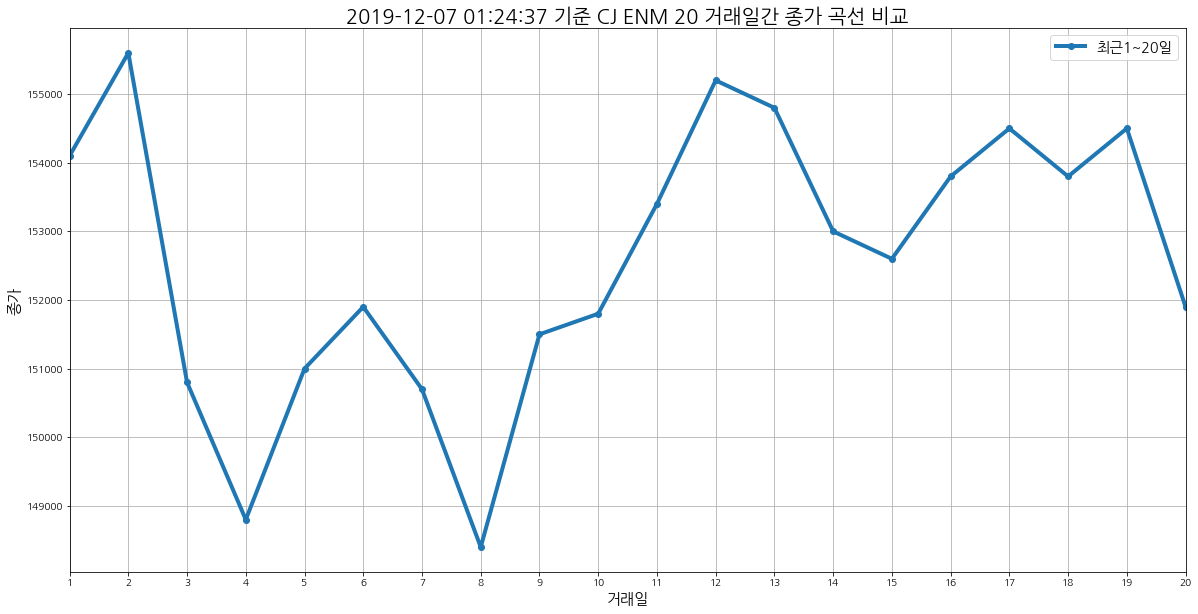

In [5]:
# 20거래일 종가 곡선 출력. 
#위 셀과 *****반드시***** 연동
stock_dict={}
if t=='1':
    KSP50__.ordering_item(1)
    stock_dict['최근1~20일']=list(reversed(KSP50__.kospi_list[n-1].price_trend[:20]))
  #  stock_dict['최근21~40일']=list(reversed(KSP50__.kospi_list[n-1].price_trend[20:40]))
  #  stock_dict['최근41~60일']=list(reversed(KSP50__.kospi_list[n-1].price_trend[40:60]))
    temp20=list(reversed(KSP50__.kospi_list[n-1].prev_date[:20]))
 #   temp40=list(reversed(KSP50__.kospi_list[n-1].prev_date[20:40]))
#    temp60=list(reversed(KSP50__.kospi_list[n-1].prev_date[40:60]))
else:
    KDQ50__.ordering_item(1)
    stock_dict['최근1~20일']=list(reversed(KDQ50__.kosdaq_list[n-1].price_trend[:20]))
   # stock_dict['최근21~40일']=list(reversed(KDQ50__.kosdaq_list[n-1].price_trend[20:40]))
   # stock_dict['최근41~60일']=list(reversed(KDQ50__.kosdaq_list[n-1].price_trend[40:60]))
    temp20=list(reversed(KDQ50__.kosdaq_list[n-1].prev_date[:20]))
    #temp40=list(reversed(KDQ50__.kosdaq_list[n-1].prev_date[20:40]))
    #temp60=list(reversed(KDQ50__.kosdaq_list[n-1].prev_date[40:60]))

selected_stock=pd.DataFrame(stock_dict, columns=pd.Index(['최근1~20일']),\
                            index=[i for i in range(1, 21)])
selected_stock.plot(figsize=(20, 10), marker='o',lw=4, alpha=1.0)

plt.ylabel('종가', fontsize=15)
plt.xlabel('거래일', fontsize=15)
plt.xticks([i for i in range(1, 21)])
now=datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
plt.title("{} 기준 {} 20 거래일간 종가 곡선 비교".format(now, x), fontsize=20)
plt.grid(True)
plt.legend(loc=0, fontsize='x-large')

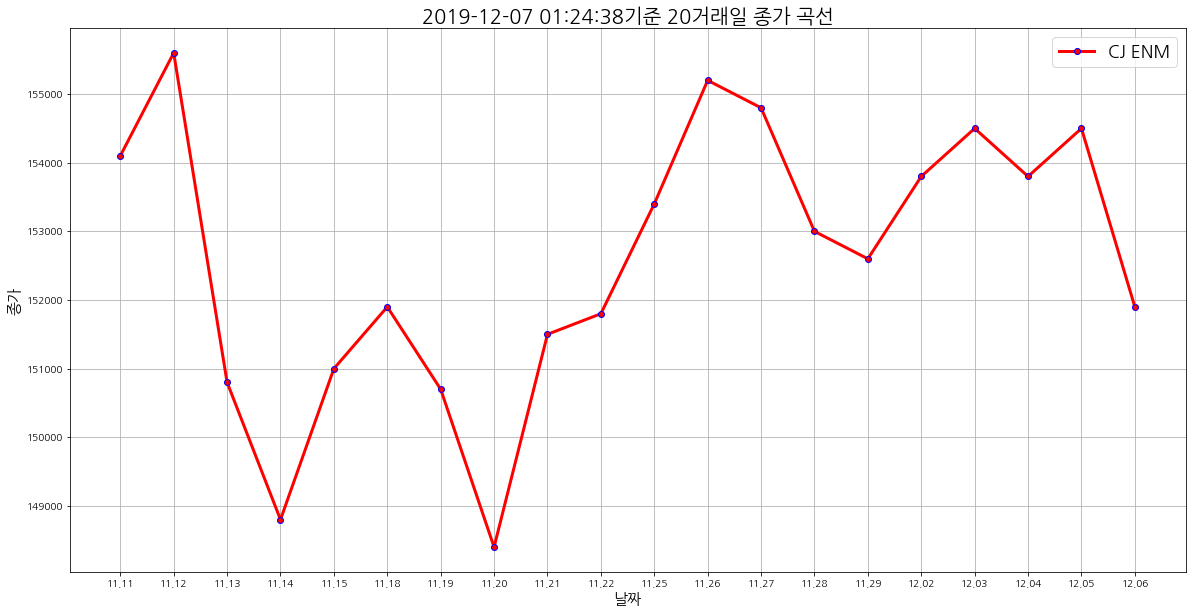

In [6]:
dict60={}
if t==1:
    dict60['종가']=list(reversed(KSP50__.kospi_list[n-1].price_trend))
    stock_table60=pd.DataFrame(dict60, columns=['종가'],\
                               index=list(reversed(KSP50__.kospi_list[n-1].prev_date)))
else:
    dict60['종가']=list(reversed(KDQ50__.kosdaq_list[n-1].price_trend))
    stock_table60=pd.DataFrame(dict60, columns=['종가'],\
                               index=list(reversed(KDQ50__.kosdaq_list[n-1].prev_date)))
f1=plt.figure(figsize=(20, 10))
plt.ylabel('종가', fontsize=15)
plt.xlabel('날짜', fontsize=15)
now=datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
plt.title("{}기준 20거래일 종가 곡선".format(now), fontsize=20)
plt.grid(True)
plt.plot(stock_table60, label=x, marker='o', c='r', lw=3, ls='-', mec='b')
plt.legend(loc=0, fontsize='xx-large')
plt.show()

In [7]:
all_list={'KOSPI':ksp_name, 'KOSDAQ':kdq_name}
all_frame=pd.DataFrame(all_list, columns=['KOSPI', 'KOSDAQ'], index=range(1, 51))
all_frame

,KOSPI,KOSDAQ
1,삼성전자,셀트리온헬스케어
2,SK하이닉스,에이치엘비
3,삼성전자우,CJ ENM
4,NAVER,펄어비스
5,삼성바이오로직스,스튜디오드래곤
6,현대차,케이엠더블유
7,현대모비스,휴젤
8,셀트리온,SK머티리얼즈
9,LG화학,메디톡스
10,신한지주,헬릭스미스


In [8]:
#이름으로 기업 정보 검색하기

print("위 셀의 표를 참고하세요")
try:
    name=input("알고 싶은 기업 이름을 입력하세요\n")
    print("")

    print("     {} :    ".format(dic[name][0][2]))
    print("시가총액 : {}위".format(dic[name][0][0]))
    print("종목코드 : {}".format(dic[name][0][1]))
    print("당일 종가: {}".format(dic[name][0][3]))
    print("시가총액 : {}억원".format(dic[name][0][4]))
    print("발행주식 수 :{}천 주".format(dic[name][0][5]))
    print("거래량 : {}주".format(dic[name][0][6]))
    print("PER : {}".format(dic[name][0][7]))
    print("ROE : {}".format(dic[name][0][8]))
    special_stock_trend={'거래량':dic[name][1][4],
                  '전일비':dic[name][1][2],
                 '종가': dic[name][1][1],
                 '등락률':dic[name][1][3],
                 '기관':dic[name][1][5],
                 '외국인':dic[name][1][6]}

    special_stock=pd.DataFrame(special_stock_trend, columns=['종가','전일비','등락률','거래량','기관','외국인'],\
                                index=dic[name][1][0])

except KeyError:
    print("********************************************************************************")    
    print("****************해당 종목이 존재하지 않습니다. 다시 실행해주세요****************")
    print("********************************************************************************")    


위 셀의 표를 참고하세요
알고 싶은 기업 이름을 입력하세요
삼성전자

     삼성전자 :    
시가총액 : 1위
종목코드 : 005930
당일 종가: 50400
시가총액 : 3008770억원
발행주식 수 :5969783천 주
거래량 : 10872618주
PER : 8.37
ROE : 19.63


In [9]:
special_stock

,종가,전일비,등락률,거래량,기관,외국인
12.06,50400,900,1.82,10872618,1286390,-571291
12.05,49500,50,0.10,10449715,-414244,-398040
12.04,49450,-450,-0.90,13246549,147190,-1744831
12.03,49900,-500,-0.99,12059812,1706963,-3428552
12.02,50400,100,0.20,18877252,2406489,-2825972
11.29,50300,-1000,-1.95,11179334,-293759,-2819438
11.28,51300,-900,-1.72,6833885,533122,-1629404
11.27,52200,400,0.77,7546261,809775,-571908
11.26,51800,0,0.00,27372226,6971446,-7501924
11.25,51800,200,0.39,9050625,2435789,-2607860


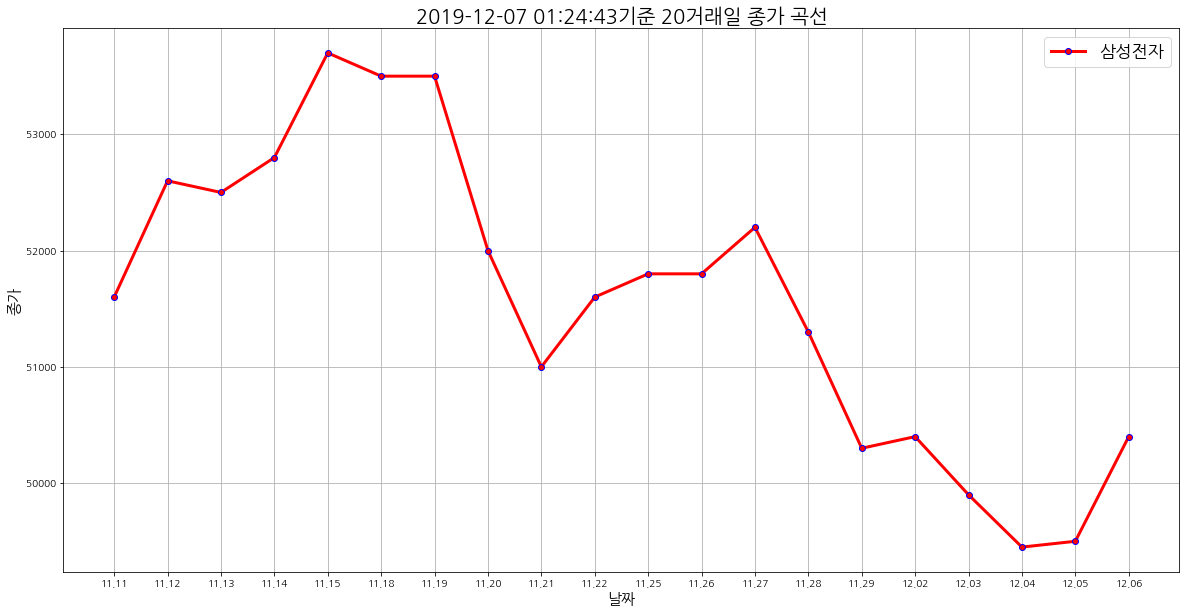

In [10]:
dict_name60={}
if name in ksp_name:
    KSP50__.ordering_item(1)
    ind=ksp_name.index(name)
    dict_name60['종가']=list(reversed(KSP50__.kospi_list[ind].price_trend))
    stock_table60=pd.DataFrame(dict_name60, columns=['종가'],\
                               index=list(reversed(KSP50__.kospi_list[ind].prev_date)))
else:
    KDQ50__.ordering_item(1)

    ind=kdq_name.index(name)
    dict_name60['종가']=list(reversed(KDQ50__.kosdaq_list[ind].price_trend))
    stock_table60=pd.DataFrame(dict_name60, columns=['종가'],\
                               index=list(reversed(KDQ50__.kosdaq_list[ind].prev_date)))
f1=plt.figure(figsize=(20, 10))
plt.ylabel('종가', fontsize=15)
plt.xlabel('날짜', fontsize=15)
now=datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
plt.title("{}기준 20거래일 종가 곡선".format(now), fontsize=20)
plt.grid(True)
plt.plot(stock_table60, label=name, marker='o', c='r', lw=3, ls='-', mec='b')
plt.legend(loc=0, fontsize='xx-large')
plt.show()

In [11]:
try:
    s=int(input("보고 싶은 시장을 입력하세요: 1: KOSPI, 2:KOSDAQ"))
    if(s==1):
        print("KOSPI가 선택되었습니다.")
        print("""
        1 : 시가총액
        2 : 20거래일간 상승률
        3 : PER
        4 : ROE
        5 : 20거래일간 기관 순매수량
        6 : 20거래일간 외국인 순매수량
        """)
        select=int(input("순위별로 보고 싶은 항목을 선택하세요:\n"))

        KSP50__.ordering_item(select)
        temp=[]
        ranking=[str(i)+'위' for i in range(1, 51)]
        stock_ranking={'이름': [KSP50__.kospi_list[i].name for i in range(50)],
                      '상승률':[KSP50__.kospi_list[i].rise_rate for i in range(50)],
                      'PER':[KSP50__.kospi_list[i].per for i in range(50)],
                      'ROE':[KSP50__.kospi_list[i].roe for i in range(50)],
                      '기관 순매수':[KSP50__.kospi_list[i].net_agency for i in range(50)],
                      '외인 순매수':[KSP50__.kospi_list[i].net_foreign for i in range(50)]}
        stock_ranking_table=pd.DataFrame(stock_ranking, columns=['이름','상승률','PER','ROE','기관 순매수','외인 순매수'],\
                                    index=ranking)
    elif(s==2):
        print("KOSDAQ이 선택되었습니다.")
        print("""
        1 : 시가총액
        2 : 20거래일간 상승률
        3 : PER
        4 : ROE
        5 : 20거래일간 기관 순매수량
        6 : 20거래일간 외국인 순매수량
        """)
        select=int(input("순위별로 보고 싶은 항목을 선택하세요:"))

        KDQ50__.ordering_item(select)
        temp=[]
        ranking=[str(i)+'위' for i in range(1, 51)]
        stock_ranking={'이름': [KDQ50__.kosdaq_list[i].name for i in range(50)],
                      '상승률':[KDQ50__.kosdaq_list[i].rise_rate for i in range(50)],
                      'PER':[KDQ50__.kosdaq_list[i].per for i in range(50)],
                      'ROE':[KDQ50__.kosdaq_list[i].roe for i in range(50)],
                      '기관 순매수':[KDQ50__.kosdaq_list[i].net_agency for i in range(50)],
                      '외인 순매수':[KDQ50__.kosdaq_list[i].net_foreign for i in range(50)]}

        stock_ranking_table=pd.DataFrame(stock_ranking, columns=['이름','상승률','PER','ROE','기관 순매수','외인 순매수'],\
                                    index=ranking)
    else:
        raise Wrong("**************올바르지 않은 값이 입력되었습니다. 다시 입력해주세요**************")
except Wrong as e:
    print("********************************************************************************")  
    print(e.args[0])
    print("********************************************************************************")
    
except TypeError:
    print("*************************************************************************************")
    print("**데이터 중에 숫자가 아닌 항목이 있어 정렬할 수 없습니다. 다른 항목을 선택해 주세요**")
    print("*************************************************************************************")



보고 싶은 시장을 입력하세요: 1: KOSPI, 2:KOSDAQ2
KOSDAQ이 선택되었습니다.

        1 : 시가총액
        2 : 20거래일간 상승률
        3 : PER
        4 : ROE
        5 : 20거래일간 기관 순매수량
        6 : 20거래일간 외국인 순매수량
        
순위별로 보고 싶은 항목을 선택하세요:2


In [12]:
stock_ranking_table

,이름,상승률,PER,ROE,기관 순매수,외인 순매수
1위,젬백스,71.548117,-126.15,-11.85,822617,-411743
2위,씨젠,24.549550,73.73,7.48,-21904,507723
3위,알테오젠,16.750251,-113.45,-12.91,-169344,-31415
4위,리노공업,16.698292,19.27,19.82,-2004,144582
5위,아이티엠반도체,16.396396,26.61,24.37,287603,-31318
6위,파트론,14.912281,76.16,3.09,470512,1259270
7위,국일제지,9.009009,-318.42,-3.98,-133504,4435144
8위,컴투스,6.326531,10.34,16.15,53419,-39660
9위,케이엠더블유,4.723618,-56.20,-45.51,18536,229635
10위,포스코 ICT,3.202479,-22.20,-9.26,213493,292927


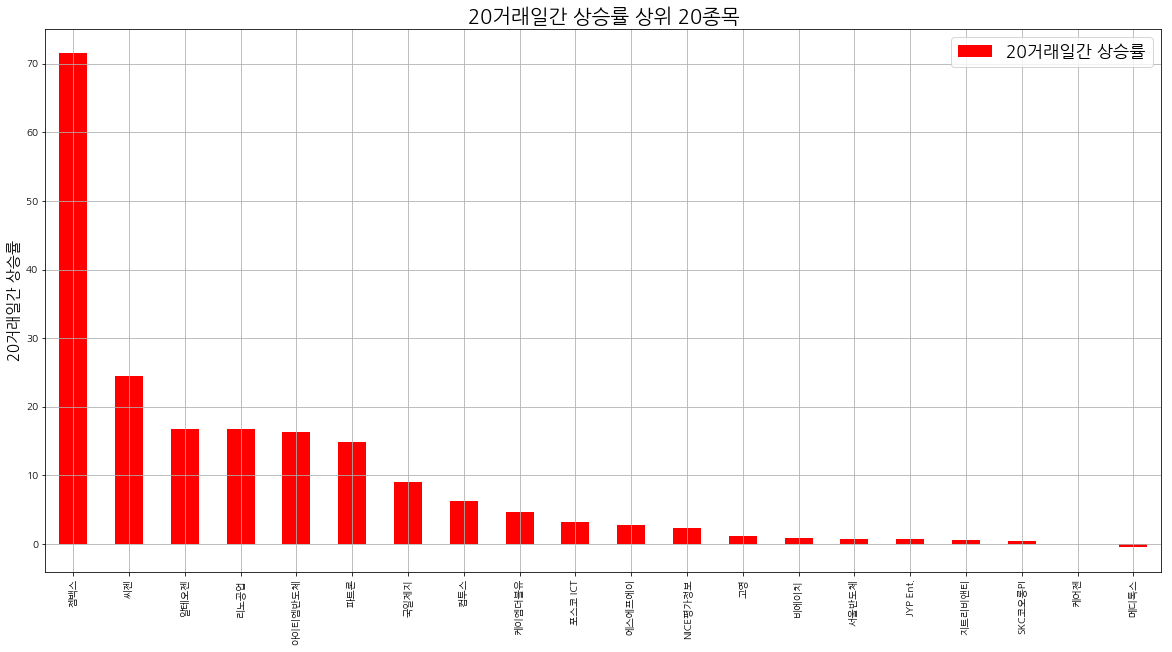

In [15]:

if s==1:
    KSP50__.ordering_item(2)

    recommend_total={'20거래일간 상승률':[KSP50__.kospi_list[i].rise_rate for i in range(20)]}

    recommend_total_frame=pd.DataFrame(recommend_total, columns=['20거래일간 상승률'],\
                                index=[KSP50__.kospi_list[i].name for i in range(20)]) 
else:
    KDQ50__.ordering_item(2)
    recommend_total={'20거래일간 상승률':[KDQ50__.kosdaq_list[i].rise_rate for i in range(20)]}
    recommend_total_frame=pd.DataFrame(recommend_total, columns=['20거래일간 상승률'],\
                            index=[KDQ50__.kosdaq_list[i].name for i in range(20)])
    
recommend_total_frame.plot(figsize=(20, 10),kind='bar', alpha=1.0, color='r')
plt.grid(True)
plt.ylabel("20거래일간 상승률", fontsize=15)
plt.title("20거래일간 상승률 상위 20종목", fontsize=20)
plt.legend(loc=1, fontsize='xx-large')

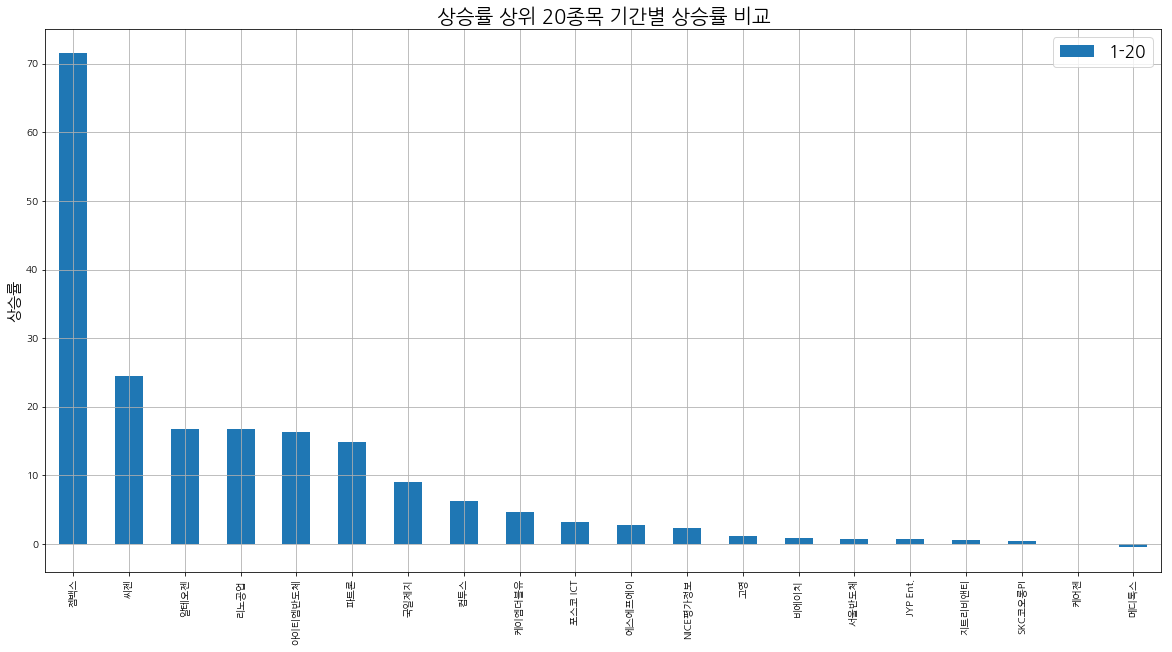

In [14]:

if s==1:
    KSP50__.ordering_item(2)

    recommend={'1-20':[KSP50__.kospi_list[i].rise_rate20 for i in range(20)]}

    recommend_frame=pd.DataFrame(recommend, columns=['1-20'],\
                                index=[KSP50__.kospi_list[i].name for i in range(20)]) 
else:
    KDQ50__.ordering_item(2)
    recommend={'1-20':[KDQ50__.kosdaq_list[i].rise_rate20 for i in range(20)]}
    recommend_frame=pd.DataFrame(recommend, columns=['1-20'],\
                            index=[KDQ50__.kosdaq_list[i].name for i in range(20)])

recommend_frame.plot(figsize=(20, 10),kind='bar', alpha=1.0)
plt.grid(True)
plt.ylabel("상승률", fontsize=15)
plt.title("상승률 상위 20종목 기간별 상승률 비교", fontsize=20)
plt.legend(loc=1, fontsize='xx-large')